# Feature attribution for explainable AI in vision (LIME) <mark>Part 2</mark>



[![Everything Is AWESOME](https://i3.ytimg.com/vi/6NPvTcJOGE0/maxresdefault.jpg)](https://www.youtube.com/watch?v=6NPvTcJOGE0&ab_channel=DeepLearningIIE "How the XAI methods works")

In this post, we will study how
<mark style="background-color:LavenderBlush;">LIME</mark> (Local
Interpretable Model-agnostic Explanations) (\[1\]) generates
explanations for image classification tasks. The basic idea is to
understand why a machine learning model predicts that a specific image
belongs to a certain class (<em>Caretta-caretta</em> in our visual example).
Briefly, this technique constructs a <em>new</em> simple model (for
example a <mark style="background-color:LavenderBlush;"><em>linear
classifier</em></mark>) which is easy to be interpreted by humans and at the same time approximates
the predictions of the <em>black-box</em> model in the neighborhood
around the instance that needs to be explained (<em>local faithfulness
</em>).

The <mark style="background-color:LavenderBlush;">LIME</mark> explainer is <em>model-agnostic</em> which means is not
restricted to a specific model and can be used to explain any
<mark>black-box</mark> classifier. So we don’t need to have access to
the details of our model (input, intermediate layers etc) to generate
explanations. Moreover, the explainer is <em>local</em> meaning that it
explains the prediction of the model in the neighborhood of the instance
being explained. This technique lies in the PostHoc category of XAI
methods, since it explains the training procedure.

## Interpretable Representations

An interpretable explanation in an image classifier explainer should use
a representation that is understandable to humans, by explaining which
parts of the input image influence the model decision. For instance, the
pixel-based representations are not very informative especially when we
deal with huge images and therefore a better way to explain the model
decision is to use
[super-pixels](https://infoscience.epfl.ch/record/149300) (\[3\]). Super-pixels
are groups of pixels that share similar characteristics such as color
and texture. Hence, a possible interpretable representation for image
classification may be a binary vector indicating the <em>presence</em>
or <em>absence</em> of a super-pixel.

Thus, our explainer needs to find a way to attribute importance to each
super-pixel in the initial input image. It’s important to note here,
that the interpretable representations are meant to be just for the
<mark style="background-color:LightCyan;">LIME</mark> explainer while the <em>black-box</em> can still be trained using the
original pixel-based representations.

<mark style="background-color:LightCyan;">LIME</mark> approach aims to
just explain why the classifier took a specific decision upon a specific
input image. It does not aim to explain the whole model. Authors, in the
paper, proposed a mechanism called
<mark style="background-color:LightCyan;">SP-LIME</mark> that aims to
explain the whole model. While we will not touch this method in this
tutorial we encourage you to have a look at it in the original paper.

## LIME approach details

To explain how <mark style="background-color:LavenderBlush;">LIME</mark> works in detail we should introduce some definitions and maths
😎.

Hence, let $\mathbf{x} \in R^{d}$ denote the original vector
representation of an instance being explained (in our case a vector with
all pixels in the image), and we use $\mathbf{x}^{\prime} \in \{0, 1\}^d$ to denote a
binary vector for its interpretable representation (super-pixels).

The <mark style="background-color:LavenderBlush;">LIME</mark> explainer is defined as (or explanation model) $g \in G$, where $G$
is a class of potentially interpretable models, such as <em>linear
models</em>, <em>decision trees</em> etc. To keep things simple, in this
tutorial, we will consider just the <em>linear classifier</em> case. As not
every $g \in G$ may be simple enough to be interpretable $\Omega(g)$ is
defined as a measure of complexity (in juxtaposition with the
interpretability) of the explanation $g \in G$. For example, for
decision trees $\Omega(g)$ may be the depth of the tree, while for
linear models, $\Omega(g)$ may be the number of non-zero weights. We
define as $f: R^{d} \to R$ the <em>black-box</em> model that we would
like to explain. In classification, $f(\mathbf{x})$ is the probability
(or a binary indicator) that $\mathbf{x}$ belongs to a certain class.

We further use $\pi_{\mathbf{x}}(\mathbf{z})$ as a proximity measure
between an instance $\mathbf{z}$ to $\mathbf{x}$, so as to define
locality around $\mathbf{x}$. Finally, let
$\mathcal{L}(f, g, \pi_{\mathbf{x}})$ be a measure of how unfaithful $g$
is in approximating $f$ in the locality defined by $\pi_{\mathbf{x}}$.
To ensure both <em>interpretability</em> and <em>local fidelity</em>,
they must minimize $L(f, g, \pi_{x})$ while having $\Omega(g)$ be as low
as possible. This will keep the complexity of the explanation low while
maintaining the fidelity of the explanation high.

Hence, the loss function for the <mark style="background-color:LavenderBlush;">LIME</mark> explaner is the following equation:

$$\xi(\mathbf{x}) = \mathcal{L}(f, g, \pi_{\mathbf{x}}) + \Omega(g) $$

The first term $\mathcal{L}(f, g, \pi_{\mathbf{x}})$ in the equation is represented by the weighted square loss:

$$\mathcal{L}(f, g, \pi_{\mathbf{x}}) = \sum_{\mathbf{z}, \mathbf{z}^{'}}\pi_{\mathbf{x}}(\mathbf{z})(f(\mathbf{z})- g(\mathbf{z}^{'}))^{2} $$

with $\pi_{\mathbf{x}}$ to be a kernel function that measures the proximity of $z$ to $x$:

$$\pi_{\mathbf{x}} =  \exp(-D(\mathbf{x},\mathbf{z})^{2}/\sigma*{2})$$

The idea is that by tuning the weights $\mathbf{w}$ we can use them
directly as a feature attribution to each super-pixel. The higher the
weight that corresponds to a specific super-pixel the more important
this super-pixel is for the prediction of the <em>black-box</em> model
and vice-versa.

Its important to remind you here the terms <em>faithfulness</em>
and <em>local fidelity</em> which are about how well our explainer
$g$ can approximate the decision of the <em>black-box</em> model $f$ in
the locality defined by $\pi_{\mathbf{x}}$.

The whole <mark style="background-color:LavenderBlush;">LIME</mark> algorithm can be summarized as follows:

![](https://drive.google.com/uc?export=view&id=1_Ax1JnqFGF6mHh8buyHPvfG4CWm-XEzR)


The <mark style="background-color:LavenderBlush;">kernel</mark> shows the proximity between the instance that we desire to explain and the
generated samples in the neighborhood. The neighborhood is created by
<mark style="background-color:LightCyan;">sampling</mark> instances
around the initial image. The sampling is done by perturbing
the instance being explained. For example, in the case of images, we can
perturb the image by zeroing out some super-pixels. The perturbed
instances are then fed to the <em>black-box</em> model and the output is
used to train the explainer. The weights of the interpretable model are
then used to explain the prediction of the <em>black-box</em> model.
Finally, in the algorithm,
<mark style="background-color:Lavender;">K-lasso</mark> refers to the
regulizarion that is introduced in a previous equation and relates with
the term $\Omega(g)$.

<center>
<video autoplay muted loop controls src="files/LIME3.mp4" style="width:600px" type="video/mp4">
</video>
<figcaption>
A demonstration of the whole <mark style="background-color:LavenderBlush;">LIME</mark> algorithm.
</figcaption>
</center>

[![Everything Is AWESOME](https://i3.ytimg.com/vi/eLsB-aMjqfA/maxresdefault.jpg)](https://youtu.be/eLsB-aMjqfA "How the XAI methods works")


The above video explains the whole <mark style="background-color:LavenderBlush;">LIME</mark> process. The initial surface
represents the <mark style="background-color:Lavender;">black-box</mark>
classifier and the regions for the class of interest
(e.g. Caretta-caretta with the light-pink color). The dark red-colored
dot denotes the sample that we would like to explain and it is an image
with the label <em> Caretta-caretta</em>. The first step is to sample
the neighborhood of the point $\mathbf{x}$ that we would like to
explain. Several points are generated. The size of each generated sample
and the transparency relates to the distance from the initial point
$\mathbf{x}$ which is calculated based using
$\pi_{\mathbf{x}}(\mathbf{z})$. The next step is to apply the
<mark style="background-color:Lavender;">black-box</mark> classifier
$f()$ to find the label for each generated point. Samples with red
represent the class caretta-caretta while samples with purple represent
the adversary class (not Caretta-caretta ;). The next step is to train the
interpretable model $g()$ using the generated samples. The weights of
the interpretable model are used to explain the prediction of the
<mark style="background-color:Lavender;">black-box</mark> classifier.


## Code implementation

To begin with, we will need to import the required libraries. The code is
written in Python 3.6.9 and PyTorch 1.7.0. Before importing the libraries we need to mount the Google drive folder using the following command:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive/IG/images/

/content/gdrive/My Drive/IG/images


In [ ]:
pwd

'/content/gdrive/MyDrive/IG/images'

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import torch.nn as nn
import numpy as np
import os, json
import cv2

import torch
from torchvision import models, transforms
from torch.autograd import Variable
import torch.nn.functional as F
import copy

import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression

### Initialization of a pre-trained VGG19 model

The very first thing that we will do is load a pre-trained VGG19 model.
This model will be used to classify images and we will try to explain
its behavior. The output of the model is a vector of 1000 probabilities
belonging to each class from the ImageNet dataset. The model is
initialized and the weights are loaded. The model is set to evaluation
mode. The model is set to run on GPU if available. You can do that on
google colab by enabling the GPU option. The steps for that are the
following: <mark>Edit -\> Notebook settings -\> Hardware accelerator -\>
GPU</mark>. The code for all these steps is the following:

In [ ]:
# load model
# model_type = 'vgg19'
model = models.vgg19(pretrained=True)

# run it on a GPU if available:
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('cuda:', cuda, 'device:', device)
model = model.to(device)
# set model to evaluation
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


cuda: True device: cuda:0


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

Ignore for now the warnings! This code should return the architecture of
the VGG19 model. Of course, feel free to choose the model of your choice
(the code should work with any model). Now let’s load and process the
image (for the VGG19 classifier) that we would like to test our
<mark style="background-color:Lavender;">LIME</mark> explainer. You can
freely choose the image that you would like to explain.

In [ ]:
def imread_img(file_name):

  # read the image and convert it - Set your pathto the image
  img = cv2.imread(file_name)
  if (type(img) is np.ndarray):
    img = cv2.resize(img, (224, 224))
    img = img.astype(np.float32)
    img = img[:, :, (2, 1, 0)]
    print('img:', img.shape)
  else:
    print('image not found - set your path to the image')

  return img

We do make use of the
<mark style="background-color:Lavender;">OpenCV</mark> library to read
the <mark style="background-color:Lavender;">caretta.png</mark> image from <mark>Canvas files</mark>.
You can check all the provided images or download one from the web.

Note that you could do the same by using torchvision datasets and
transforms. We will show an example of that when we will use the
<mark style="background-color:Lavender;">LIME</mark> explainer for our
lab exercise at the end of this tutorial.

### Image pre-processing

As usual, we will need to normalize our input image. The normalization
is done using the mean and standard deviation of the ImageNet dataset.
The image is also transposed to the correct tensor format:

In [ ]:
def pre_processing(obs, cuda):
    # Students should transpose the image to the correct tensor format.
    # Students should ensure that gradient for input is calculated
    # set the GPU device
    if cuda:
        torch_device = torch.device('cuda:0')
    else:
        torch_device = torch.device('cpu')

    # normalise for ImageNet
    mean = np.array([0.485, 0.456, 0.406]).reshape([1, 1, 3])
    std = np.array([0.229, 0.224, 0.225]).reshape([1, 1, 3])
    obs = obs / 255
    obs = (obs - mean) / std

    # make tensor format that keeps track of gradient
    obs = np.transpose(obs, (2, 0, 1))
    obs = np.expand_dims(obs, 0)
    obs = np.array(obs)
    obs_tensor = torch.tensor(obs, dtype=torch.float32, device=torch_device)
    return obs_tensor

We can do the same (resizing, normalization and conversion to tensor) by
using the torchvision transform:


``` python
transform = A.Compose([
        A.Resize(224, 224),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()])
```

Then, the next that we will do is load the image and preprocess it. We
will also check the prediction of the VGG19 model. Note that the
prediction is correct (E.g. 33 and 34 are ‘caretta-caretta’ and
‘turtle’). The code is the following:

In [ ]:
def predict(input, model, target_label_idx, cuda):
    # Makes prediction after preprocessing image
    # Note that output should be torch.tensor on cuda
    output = model(input)
    output = F.softmax(output, dim=1) # calc output from model
    if target_label_idx is None:
      target_label_idx = torch.argmax(output, 1).item()
    index = np.ones((output.size()[0], 1)) * target_label_idx
    index = torch.tensor(index, dtype=torch.int64)
    if cuda:
      index = index.cuda()                     # calc prediction
    output = output.gather(1, index)           # gather functionality of pytorch
    return target_label_idx, output

# test preprocessing
# you can check that the VGG network gives a correct prediction.
img = imread_img("caretta.jpg")
input = pre_processing(img, cuda)          # preprocess: image (normalise, transpose, make tensor on cuda, requires_grad=True)
print (input.shape)
label, output = predict(input, model, None, cuda)

print('output:', output)
print('output label:', label)

img: (224, 224, 3)
torch.Size([1, 3, 224, 224])
output: tensor([[0.7080]], device='cuda:0', grad_fn=<GatherBackward0>)
output label: 33


The following code helps you to get the label of the prediction. The
label is the index of the class in the ImageNet dataset. The index is
used to get the class name from the <mark>.json</mark> file. The
<mark>.json</mark> file is available in the repository.

``` python
idx2label, cls2label, cls2idx = [], {}, {}
with open(os.path.abspath('imagenet_class_index.json'), 'r') as read_file:
    class_idx = json.load(read_file)
    idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]
    cls2label = {class_idx[str(k)][0]: class_idx[str(k)][1] for k in range(len(class_idx))}
    cls2idx = {class_idx[str(k)][0]: k for k in range(len(class_idx))}
```

## LIME explanation

The following figure illustrates the basic idea behind LIME. The figure
shows light pink and blue areas which are the decision boundaries for
the classifier (for the VGG19 pre-trained model on ImageNet for
instance). <mark style="background-color:Lavender;">LIME</mark> can
provide explanations for the predictions of an individual instance (the
one with the dark red dot). These explanations are created by generating
a new dataset of perturbations around the instance to be explained (in
our image are depicted with dot circles around the initial instance).

![](https://drive.google.com/uc?export=view&id=1iaIiUisB7vmyy6e_Jc2eAvXH7G5bgy1f)

Then, we apply our
<mark style="background-color:Lavender;">black-box</mark> model
<mark style="background-color:Lavender;">$f()$</mark> and we can extract
the label for all the perturbations (and can be seen with red that
denotes turtle and purple that denotes non-turtle). The
<em>importance</em> of each perturbation is determined by measuring its
distance from the original instance to be explained
(<mark style="background-color:Lavender;">. These distances are
converted to weights by mapping the distances to a zero-one scale using
a kernel function ($\pi_{\mathbf{x}}$ </mark>). All this information:
the newly generated dataset, its class predictions and its weights are
used to fit a simple model, such as a linear model (gray line), that can
be interpreted. The coefficients for this model are extracted and used
as the explanation for the prediction of the instance we want to
explain. The higher the coefficient, the more important the feature is
for the prediction.


## Creating Perturbations of image

In the case of image explanations, our perturbations will be generated
by zeroing out some of the superpixels in the image.

#### Extract super-pixels from the image

The superpixels are generated using the
<mark style="background-color:Lavender;">quickshift</mark> segmentation
algorithm. This algorithm is provided by the
<mark style="background-color:Lavender;">skimage.segmentation</mark>
library. The amount of superpixesls depends on the
<mark style="background-color:Lavender;">quickshift</mark> parameters
(<mark style="background-color:Lavender;">kernel_size</mark> and
<mark style="background-color:Lavender;">max_dist</mark>). The code
snippet can be found below:

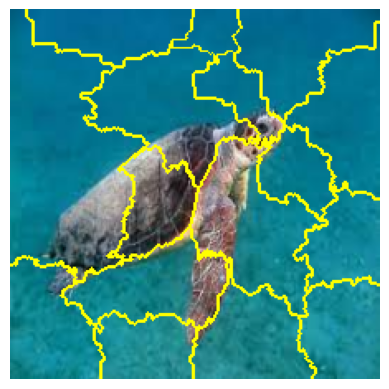

In [ ]:
import skimage.io
import skimage.segmentation

superpixels = skimage.segmentation.quickshift(img/255, kernel_size=6, max_dist=200, ratio=0.2) #it returns an image with all the super-pixel regions
num_superpixels = np.unique(superpixels).shape[0]
num_superpixels

imgplot = plt.imshow(skimage.segmentation.mark_boundaries(img/255, superpixels))
plt.axis('off')
plt.show()

The generated superpixels for the input Caretta-caretta image are shown
in the image above. Note that you can improve the result of the approach
or use another method for creating the superpixels.

### Creating random perturbations

In this example, 14 super-pixels were used. However, for real-life
applications, a larger number of super-pixels will produce more
reliable explanations.

Having extracted the super-pixels, the way that perturbations are calculated is the following: Random
zeros and ones are generated and shaped as a matrix with perturbations
as rows and superpixels as columns. An example of a perturbation (the
first one) is shown below. Here, `1` represents that a superpixel is on
and `0` represents it is off. Notice that the length of the shown vector
corresponds to the number of superpixels in the image. By running this
code:

In [ ]:
num_perturb = 150
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations[0] #Show example of perturbation

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0])

The following function `perturb_image` perturbs the given image (`img`)
based on a perturbation vector (`perturbation`) and predefined
superpixels (`segments`).

# ACTIVITY add your code here

In [ ]:
def perturb_image(img,perturbation,segments):
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  # BEGIN YOUR CODE
  # Set the active pixels in the mask to 1
  mask[np.isin(segments, active_pixels)] = 1
  # Apply the mask to the image
  perturbed_img = img * mask[:, :, np.newaxis]

  return perturbed_img #NotImplemented
  # END YOUR CODE

Let’s use the previous function to see what a perturbed image would look like:

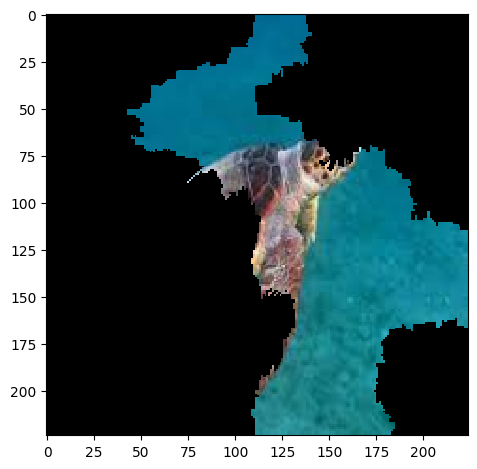

In [ ]:
skimage.io.imshow(perturb_image(img/255,perturbations[0],superpixels))

### Step 2: Use ML classifier to predict classes of newly generated images

This is the most computationally expensive step in LIME because a
prediction for each perturbed image is computed. Our aim is to construct a label for each pertubation. From the shape of the
predictions, we can see for each of the perturbations we have the output
probability for each of the 1000 classes.

In [ ]:
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(img,pert,superpixels)
  input = pre_processing(perturbed_img, cuda)
  output, label = predict(input, model, None, cuda)

  output = model(input)
  output = F.softmax(output, dim=1)
  print (output.shape)
  target_label_idx = torch.argmax(output, 1).item()

  predictions.append(output.detach().cpu().numpy())

predictions = np.array(predictions)
predictions.shape

torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size([1, 1000])
torch.Size

(150, 1, 1000)

Then, we will need to calculate the distances between the perturbations
and the original image. The distances are calculated using the cosine
distance. The smaller the distance, the more similar the vectors are.
The distances are then converted to weights using a kernel function.

In [ ]:
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled

print(original_image)
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
distances.shape

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


(150,)

As we have shown before, after calculating the distances we need to apply
kernels to use them in the loss function. The employed can is as
follows:

In [ ]:
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
weights.shape

(150,)

The last two cells actually are calculating the proximity of the pertubations with the original image given the following recipe:

$$\pi_{\mathbf{x}} =  \exp(-D(\mathbf{x},\mathbf{z})^{2}/\sigma*{2})$$

At the end, what we would like to do is to train a linear classifier and use the calculated parameters of the linear classifier as a explanation of our image. Firstly, let's check the first five classes of the prediction once again!

In [ ]:
out = model(input)
print (out.shape)
out = F.softmax(out, dim=1)

out, indices= torch.sort(out, descending=True)

top_values = out[:, :5] # Keep the first 5 values from each row
top_indices = indices[:, :5]   # Keep the corresponding indices

top5 = torch.topk(out, k=5)

topk_values = top_values.detach().cpu().numpy()
topk_indices =  top_indices.detach().cpu().numpy()

print(topk_values)
print(topk_indices)

torch.Size([1, 1000])
[[0.45575628 0.25899675 0.04494242 0.03558318 0.03351378]]
[[ 33  34   2 107 562]]


We can now train the linear model using the perturbations and the
predictions with the highest probability. The extracted coefficients (or
the explainer model weights) of the linear model are the explanations
for the predictions.

# ACTIVITY add your code

In [ ]:
import skimage.io
import skimage.segmentation

superpixels = skimage.segmentation.quickshift(img/255, kernel_size=6, max_dist=200, ratio=0.2) #it returns an image with all the super-pixel regions
num_superpixels = np.unique(superpixels).shape[0]
num_superpixels

imgplot = plt.imshow(skimage.segmentation.mark_boundaries(img/255, superpixels))
plt.axis('off')
plt.show()

num_perturb = 150
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations[0] #Show example of perturbation

def perturb_image(img,perturbation,segments):
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  # BEGIN YOUR CODE
  # Set the active pixels in the mask to 1
  mask[np.isin(segments, active_pixels)] = 1
  # Apply the mask to the image
  perturbed_img = img * mask[:, :, np.newaxis]

  return perturbed_img #NotImplemented
  # END YOUR CODE

predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(img,pert,superpixels)
  input = pre_processing(perturbed_img, cuda)
  output, label = predict(input, model, None, cuda)

  output = model(input)
  output = F.softmax(output, dim=1)
  print (output.shape)
  target_label_idx = torch.argmax(output, 1).item()

  predictions.append(output.detach().cpu().numpy())

predictions = np.array(predictions)
predictions.shape


original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled

print(original_image)
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
distances.shape

kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
weights.shape

out = model(input)
print (out.shape)
out = F.softmax(out, dim=1)

out, indices= torch.sort(out, descending=True)

top_values = out[:, :5] # Keep the first 5 values from each row
top_indices = indices[:, :5]   # Keep the corresponding indices

top5 = torch.topk(out, k=5)

topk_values = top_values.detach().cpu().numpy()
topk_indices =  top_indices.detach().cpu().numpy()

print(topk_values)
print(topk_indices)

In [ ]:
simpler_model = LinearRegression()

# BEGIN YOUR CODE
simpler_model.fit(X=perturbations, y=predictions.reshape(150, 1000)[:, topk_indices[0]], sample_weight=weights)#topk_values, topk_indices)
# add the parameters for the linear model simple_model.fit()
#END YOUR CODE

coeff = simpler_model.coef_[0]
coeff

array([ 0.04685349,  0.01577938,  0.00936465, -0.07054508,  0.02692917,
        0.12787836,  0.18035428, -0.01628821,  0.15321192,  0.10709871,
        0.00990974, -0.05314663,  0.00779555,  0.03213089,  0.00772787,
       -0.02494845])

We can now visualise the top features that the classifier used to make
its prediction. The top features are the superpixels that have the
highest coefficients.

In [ ]:
num_top_features = 5 #2
top_features = np.argsort(coeff)[-num_top_features:]
top_features

array([0, 9, 5, 8, 6])

Having calculated the top features, we can now create a mask that will
highlight the top superpixels in the image.

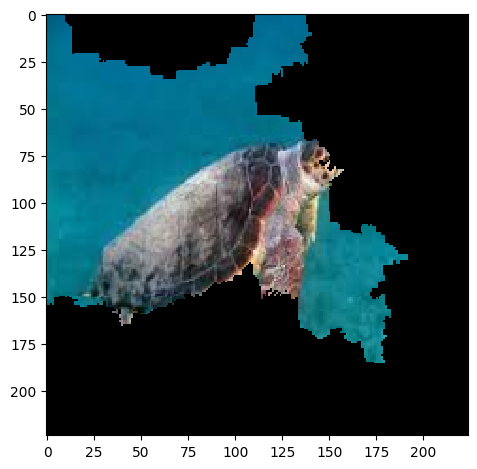

In [ ]:
mask = np.zeros(num_superpixels)
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(img/255,mask,superpixels) )

In [ ]:
# # Assuming 'img' contains the image you want to visualize
# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.imshow(img)
# plt.title("Original Image")

# plt.subplot(1, 2, 2)
# plt.imshow(perturb_image(img / 255, mask, superpixels))
# plt.title("Image with Top Superpixels Activated")

# plt.suptitle(f"Real Label: {labels}, Prediction: {predictions}")
# plt.show()

# Lab exercise <mark>TOSUBMIT</mark>

---



This part of the tutorial is a lab exercise where you will use LIME to
debias a classifier. The goal is to understand how LIME can be used to
explain the behavior of a classifier and how we can use this information
to debias the classifier.

The classifier $f()$ (you can find the trained model on Canvas zip folder) is trained to classify images of <em>huskies</em> and
<em>wolves</em>. We have zero knowledge of the training dataset and training details.

We hope that we will be able to identify the biases in the classifier and
try to debias it using LIME explainer.

We will need to explain the behavior of the classifier
using images from huskies and wolves. You should make use also the
images that you can find on the Canvas page of the course or from google
colab page. If you want you can use also your own husky and wolf images.

Firstly, we will load the classifier and the images we want to explain.
The following code checks the performance of the classifier in a test
set.

In [ ]:
def check_accuracy(loader, model, device):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)

            scores = model(x)
            _, predictions = scores.max(1)

            print ("prediction "+ str(predictions) + " label " + str(y))
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

        print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}')

Now we will load the classifier, load the images and check the
performance of the classifier.

In [ ]:
model = torch.load('hus_wolf_model.pth', map_location=device)

The following code loads the images and creates the dataloader. The
dataloader is used to load the images in batches. The images are
preprocessed using the same transformations that were used to train the
classifier. Note that the following code is the same as the one used in
the previous part of the tutorial for preprocessing images.

In [ ]:
from torchvision import datasets, transforms
# create the transformation for all the images
transform = transforms.Compose([transforms.Resize(256),
        transforms.RandomCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224,0.225])])

# Load the images
dataset = datasets.ImageFolder("LIME_test_files/", transform=transform)

dataset.classes = ['husky','wolf']
dataset.class_to_idx = {'husky':0,'wolf':1}
dataset.samples = list(filter(lambda s: s[1] in [0,1], dataset.samples))
test_dataloader = torch.utils.data.DataLoader(dataset, batch_size=32)

# Check the accuracy of the classifier
check_accuracy(test_dataloader, model, device)

prediction tensor([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0], device='cuda:0') label tensor([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], device='cuda:0')
Got 4 / 11 with accuracy 36.36


In [ ]:
def check_mod(loader, model, device):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)

            scores = model(x)
            _, predictions = scores.max(1)
            print(prdictions)


            # print ("prediction "+ str(predictions) + " label " + str(y))
            # num_correct += (predictions == y).sum()
            # num_samples += predictions.size(0)

        # print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}')

In [ ]:
# Check the accuracy of the classifier
check_accuracy(test_dataloader, model, device)

prediction tensor([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0], device='cuda:0') label tensor([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], device='cuda:0')
Got 4 / 11 with accuracy 36.36


In [ ]:
test_img = imread_img("LIME_test_files/husky/Dog-Siberian_Husky-Two_Siberian_Huskies_with_their_ears_tall,_waiting_for_the_next_command.jpg")

img: (224, 224, 3)


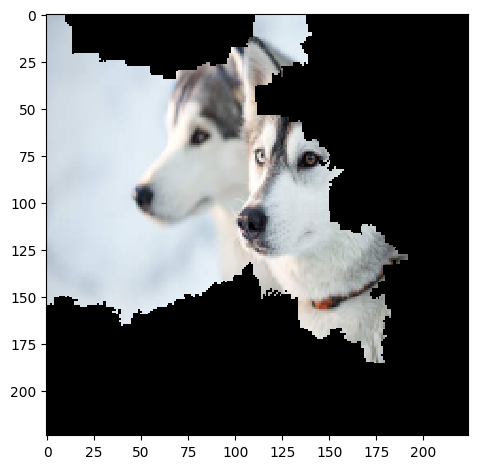

In [ ]:
mask = np.zeros(num_superpixels)
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(test_img/255,mask,superpixels) )

In [ ]:
# # Extract the weights of the model
# if hasattr(model, "fc"):
#     weights = model.fc.weight  # Fully connected layer weights
# elif hasattr(model, "classifier"):
#     weights = model.classifier.weight  # Classifier weights
# else:
#     raise ValueError("Could not find the weight tensor in the model.")

# # Calculate the importance scores
# importance_scores = torch.abs(weights)

# # Retrieve the top 5 features
# topk_scores, topk_indices = torch.topk(importance_scores, k=5)

# Print the top 5 features
# print("Top 5 features:")
# for i in range(5):
#     print(f"Feature {i+1}: Index {topk_indices[i]}, Score {topk_scores[i]}")

In [ ]:
# topk_indices, topk_scores

In [ ]:
for i, (image, label) in enumerate(dataset):
    # Get the predicted label for the image
    image = image.unsqueeze(0).to(device)
    realimshow(image.squeeze().cpu().numpy().transpose(1, 2, 0))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of columns in the grid
num_cols = 5

# Create a subplot grid
fig, axes = plt.subplots(2, num_cols, figsize=(15, 6))

# Iterate through the top 5 features
for i, feature_idx in enumerate(top_features):
    # Get the real image from the test set
    real_image, _ = dataset[feature_idx]

    # Get the masked image using perturb_image function
    masked_image = perturb_image(real_image / 255, mask, superpixels)

    # Plot the real image on the top row
    axes[0, i].imshow(real_image.permute(1, 2, 0))
    axes[0, i].axis('off')
    axes[0, i].set_title('Real Image')

    # Plot the masked image on the bottom row
    axes[1, i].imshow(masked_image)
    axes[1, i].axis('off')
    axes[1, i].set_title('Masked Image')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()


What is the accuracy of the method in the test set?

By using the LIME algorithm established
in previous cells, you should explain the behavior of the classifier.
You should use the provided images from zip folder <mark>LIME_test_files</mark> folder.
<mark style="background-color:Lavender;"> Add your conclusions about the
model $f()$</mark>. What are the main issues with this classifier?

Add your conclusions as a second paragraph in your report.

# You should not trust me! <mark>TOSUBMIT</mark>

Now you feel like a <em>hacker</em> and you would like to fool LIME
explanations by constructing adversarial classifiers. To do that we will
follow the process that is described in the following paper \[4\]. You
can find a detailed also explanation in the following video:

[<span class="image placeholder"
original-image-src="../../../assets/img/2023-05-13-LIME/fooling_LIME.PNG"
original-image-title="">You should not trust
me!</span>](https://www.youtube.com/watch?v=qCYAKmFFpbs&ab_channel=MLExplained-AggregateIntellect-AI.SCIENCE "You should not trust me!")

  This part of the tutorial is the third part of the assignment you need to
  <mark>TOSUBMIT</mark>. The goal is to understand the limitations of LIME
  and how we can take advantage of them to perform adversarial attacks.
  The main focus is to understand the way that LIME generates samples (the
  perturbations and the distribution of the perturbations in comparison
  with the real data).

  The setup is the following:

  As an adversary hacker, you are intending to deploy the biased
  classifier $f$ for making a <em>critical decision</em> (e.g., confusing
  huskies with wolves 😱) in the real world. The adversary must provide
  black box access to customers and examiners, who may use post hoc
  explanation techniques to better understand $f$ and determine if $f$ is
  ready to be used in the real world. If customers and regulators detect
  that $f$ is biased, they are not likely to approve it for deployment.
  The goal of the adversary is to fool post hoc explanation techniques and
  hide the underlying biases of $f$.

  In this assignment, you need to illustrate the difference between the distribution of real samples and the perturbations. Find a way to illustrate that in an example of your choice.

  <mark>Optionally</mark>, you should create a scaffolded classifier $e$ that
  behaves exactly like $f$ when making predictions on instances sampled
  from $X_{dist}$ (real samples) but will not reveal the underlying biases of $f$ when probed with leading post hoc explanation techniques such as LIME.

  To do that you will need to follow the steps of the suggested paper. You
  need to find ways to differentiate the real data from the generated data
  and based on that create the scaffolded classifier $e$ that will fool
  LIME.

  For this assignment, you will need to read the proposed paper and think of ways to perform adversarial attacks using the provided model. Add in your report an explanation of the procedure and the image with the difference between the 2 distributions. Optionally you can add examples of how the classifier $e$ can work in our case.

## Guidelines for the Canvas submissions:

- You should prepare a report based on researching the <mark>TOSUBMIT</mark> from both notebooks.
- This report should contain three paragraphs. One will be about Integrated gradient and the questions that can be found at the end of the first notebook, one for the LIME explanations using the provided model, and finally one about adversarial attacks (an image with the distributions).
- Optionally, you should add one paragraph with the results of a scaffolding classifier that can fool LIME and some visual results with that.

# Journal club for weeks 2 and 3

The papers for weeks 2 and 3 can be found on Canvas at the following links:

- https://arxiv.org/pdf/1711.11279.pdf
- https://openaccess.thecvf.com/content/CVPR2021/papers/Chefer_Transformer_Interpretability_Beyond_Attention_Visualization_CVPR_2021_paper.pdf



# Mini-project ideas

This part of the tutorial relates to ideas about extending parts of this tutorial. One point of criticism of the LIME technique is the way that the perturbations are taking place since the distributions between real and generated data are significantly different. Think of ways to improve the gap (using alternative ways to perform perturbations).
- Think of ways to improve the feature repressions (replacing super-pixels).
- Another direction could be to come up with an evaluation scheme and perform a study comparing LIME, IG or other methods for explainable AI.

# Conclusions

In this tutorial, we have analyzed LIME a posthoc XAI technique. An
explanation of how this technique works but also step-by-step the code
to implement it. We have also seen how we can use LIME to explain
image-classifiers but also how to identify the bias in a classifier.